In [ ]:
# Импортирование необходимых библиотек
import matplotlib.pyplot as plt   # Отрисовка изображений в Colab
from PIL import Image, ImageDraw  # Библиотека для работы с изображениями
from google.colab import files
import numpy as np


In [ ]:
def smart_crop(img, target_h, target_w):
  img_w, img_h = img.size                 # Сохраняем размер картинки

  # print("img_w = " + str(img_w))
  # print("img_h = " + str(img_h))
  # print("_____________________")

  # Проверка на формат и сжатие
  if img_h > img_w:
    new_w = target_w                       # Подстраиваемся под ширину
    new_h = round(new_w / img_w * img_h)  # Рассчитываем приблизительную высоту

    # print("new_w = " + str(new_w))
    # print("new_h = " + str(new_h))
    # print("_____________________")
  else:
    new_h = target_h                      # Подстраиваемся под высоту
    new_w = round(new_h / img_h * img_w)  # Рассчитываем приблизительную ширину
    # print("new_w = " + str(new_w))
    # print("new_h = " + str(new_h))
    # print("_____________________")
  
  img = img.resize((new_w, new_h), Image.ANTIALIAS) # Применяем первые изменения

                                        # Обрезка лишнего

  # Находим координаты центра сжатой картинки
  center_w = new_w // 2
  center_h = new_h // 2

  # print("center_w = " + str(center_w))
  # print("center_h = " + str(center_h))
  # print("_____________________")

  # Находим левую верхнюю точку для прямоугольной обрезки
  top_left_w = center_w - target_w // 2
  top_left_h = center_h - target_h // 2

  # print('top_left_w = ' + str(top_left_w) )
  # print('top_left_h = ' + str(top_left_h) )

  # Находим правую нижняя точку для прямоугольной обрезки
  bottom_right_w = center_w + target_w // 2
  bottom_right_h = center_h + target_h // 2

  # print('bottom_right_w = ' + str(bottom_right_w) )
  # print('bottom_right_h = ' + str(bottom_right_h) )

  # Обрезаем изображение прямоугольной областью по заданным координатам
  img = img.crop((top_left_w, top_left_h, bottom_right_w, bottom_right_h))

  return img

In [ ]:
# Загружаем картинку
img = files.upload()

# Достаём только первую картинку
img = Image.open(list(img.keys())[0])

Saving Milky Way.jpg to Milky Way (1).jpg


(300, 300)


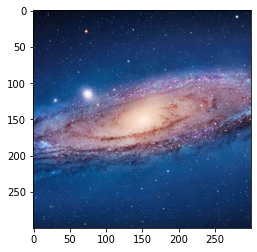

In [ ]:
img = smart_crop(img, 300, 300)
plt.imshow(img)
print(img.size)